# ONLINE SALES DATA

### Comment optimiser les revenus des ventes en ligne tout en minimisant les retours produits pour améliorer la rentabilité globale ?

Quels sont les pays et catégories les plus rentables ? Y a-t-il des régions ou des catégories qui pourraient bénéficier de stratégies de marketing ciblées pour augmenter les ventes ?

Quels canaux de vente (en ligne vs en magasin) sont les plus rentables par catégorie de produit ? Est-il possible de spécialiser les canaux pour maximiser la rentabilité ?

Quels sont les facteurs qui influencent le taux de retour des produits ? Par exemple, est-ce lié à la catégorie, au pays, au canal de vente ou à la méthode de livraison ?

Les méthodes de paiement influencent-elles la rentabilité et les retours ? Existe-t-il une association entre certains modes de paiement et des taux de retour plus élevés ?

La localisation des entrepôts affecte-t-elle les coûts d’expédition et les délais de livraison ? Y a-t-il des options pour optimiser la logistique en fonction des régions ou des catégories ?

### Import des librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from skimpy import skim
import warnings
warnings.filterwarnings("ignore")

## Exploration

In [10]:
df = pd.read_csv(r"C:\Users\devin\OneDrive\Bureau\SUJET PF preselection\Online sales\online_sales_dataset.csv")

In [11]:
df.head(10)

InvoiceNo StockCode     Description  Quantity       InvoiceDate  UnitPrice  \
0     221958  SKU_1964       White Mug        38  2020-01-01 00:00       1.71   
1     771155  SKU_1241       White Mug        18  2020-01-01 01:00      41.25   
2     231932  SKU_1501      Headphones        49  2020-01-01 02:00      29.11   
3     465838  SKU_1760       Desk Lamp        14  2020-01-01 03:00      76.68   
4     359178  SKU_1386       USB Cable       -30  2020-01-01 04:00     -68.11   
5     744167  SKU_1006    Office Chair        47  2020-01-01 05:00      70.16   
6     210268  SKU_1087       USB Cable        25  2020-01-01 06:00      85.74   
7     832180  SKU_1597        Notebook         8  2020-01-01 07:00      95.65   
8     154886  SKU_1907  Wireless Mouse        19  2020-01-01 08:00      98.19   
9     237337  SKU_1866      Headphones        40  2020-01-01 09:00      98.17   

   CustomerID         Country  Discount  PaymentMethod  ShippingCost  \
0     37039.0       Australia  0.470000  Bank Transfer         10.79   
1     19144.0           Spain  0.190000        paypall          9.51   
2     50472.0         Germany  0.350000  Bank Transfer         23.03   
3     96586.0     Netherlands  0.140000        paypall         11.08   
4         NaN  United Kingdom  1.501433  Bank Transfer           NaN   
5     53887.0          Sweden  0.480000    Credit Card         13.98   
6     46567.0         Belgium  0.150000  Bank Transfer         12.92   
7     75098.0          Norway  0.040000  Bank Transfer          6.48   
8     87950.0         Belgium  0.050000        paypall         12.56   
9     39718.0           Italy  0.160000  Bank Transfer          7.71   

      Category SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation  \
0      Apparel     In-store  Not Returned              UPS            London   
1  Electronics       Online  Not Returned              UPS              Rome   
2  Electronics       Online      Returned              UPS            Berlin   
3  Accessories       Online  Not Returned       Royal Mail              Rome   
4  Electronics     In-store  Not Returned            FedEx               NaN   
5  Electronics       Online  Not Returned              DHL            London   
6   Stationery       Online  Not Returned            FedEx         Amsterdam   
7  Electronics     In-store  Not Returned       Royal Mail         Amsterdam   
8      Apparel       Online  Not Returned              UPS            Berlin   
9      Apparel       Online  Not Returned       Royal Mail            London   

  OrderPriority  
0        Medium  
1        Medium  
2          High  
3           Low  
4        Medium  
5        Medium  
6          High  
7           Low  
8          High  
9           Low

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [13]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 49782  │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA    ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ InvoiceNo      │     0 │     0 │  550700 │  260700 │  100000 │ 324500 │ 552200 │ 776400 │ 1000000 │ ▇▇▇▇▇▇ │  │
│ │ Quantity       │     0 │     0 │   22.37 │   17.92 │     -50 │     11 │     23 │     37 │      49 │    ▇▇▇ │  │
│ │ UnitPrice      │     0 │     0 │   47.54 │   33.48 │  -99.98 │  23.59 │  48.92 │  74.61 │     100 │    ▇▇▇ │  │
│ │ CustomerID     │  4978 │    10 │   55030 │   25910 │   10000 │  32750 │  55160 │  77310 │  100000 │ ▇▇▇▇▇▇ │  │
│ │ Discount       │     0 │     0 │  0.2757 │  0.2301 │       0 │   0.13 │   0.26 │   0.38 │       2 │   ▇▃   │  │
│ │ ShippingCost   │  2489 │     5 │   17.49 │   7.221 │       5 │  11.22 │   17.5 │  23.72 │      30 │ ▇▇▇▇▇▇ │  │
│ └────────────────┴───────┴───────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ StockCode                        │         0 │         0 │                        1 │                49782 │  │
│ │ Description                      │         0 │         0 │                      1.6 │                81539 │  │
│ │ InvoiceDate                      │         0 │         0 │                        2 │                99564 │  │
│ │ Country                          │         0 │         0 │                      1.2 │                58020 │  │
│ │ PaymentMethod                    │         0 │         0 │                      1.7 │                83059 │  │
│ │ Category                         │         0 │         0 │                        1 │                49782 │  │
│ │ SalesChannel                     │         0 │         0 │                        1 │                49782 │  │
│ │ ReturnStatus                     │         0 │         0 │                      1.9 │                94670 │  │
│ │ ShipmentProvider                 │         0 │         0 │                      1.2 │                62205 │  │
│ │ WarehouseLocation                │      3485 │         7 │                     0.93 │                46297 │  │
│ │ OrderPriority                    │         0 │      

In [14]:
df.describe()

InvoiceNo      Quantity     UnitPrice    CustomerID      Discount  \
count   49782.000000  49782.000000  49782.000000  44804.000000  49782.000000   
mean   550681.239946     22.372343     47.537862  55032.871775      0.275748   
std    260703.009944     17.917774     33.479510  25913.660157      0.230077   
min    100005.000000    -50.000000    -99.980000  10001.000000      0.000000   
25%    324543.000000     11.000000     23.592500  32750.750000      0.130000   
50%    552244.000000     23.000000     48.920000  55165.000000      0.260000   
75%    776364.000000     37.000000     74.610000  77306.250000      0.380000   
max    999997.000000     49.000000    100.000000  99998.000000      1.999764   

       ShippingCost  
count  47293.000000  
mean      17.494529  
std        7.220557  
min        5.000000  
25%       11.220000  
50%       17.500000  
75%       23.720000  
max       30.000000

In [15]:
df["InvoiceDate"]= pd.to_datetime(df["InvoiceDate"])

In [16]:
df = df.dropna(subset = ["CustomerID"])

In [17]:
df["Discount"] = df["Discount"].round(2)

## Analyse univariée

Quel est le produit ayant le prix unitaire, le plus important? Le plus faible? quelles sont les quantités vendues sur ces produits?

In [123]:
max_price_product = df.loc[df["UnitPrice"].idxmax()]
print("Produit avec le prix unitaire le plus élevé:")
print(max_price_product[["Description","UnitPrice","Quantity"]])

Produit avec le prix unitaire le plus élevé:
Description    Wall Clock
UnitPrice           100.0
Quantity               18
Name: 33188, dtype: object


In [124]:
min_price_product=df.loc[df["UnitPrice"].idxmin()]
print("Produit avec le prix unitaire le plus bas:")
print(min_price_product[["Description", "UnitPrice", "Quantity"]])

Produit avec le prix unitaire le plus bas:
Description    Desk Lamp
UnitPrice            1.0
Quantity               7
Name: 8446, dtype: object


### Pays 

Quelle est la répartition des commandes en fonction du pays?

In [125]:
count_countries = df["Country"].value_counts()
print(count_countries)

Country
France            3820
Sweden            3771
Germany           3763
Netherlands       3753
Portugal          3747
Belgium           3745
Norway            3740
United Kingdom    3735
Spain             3700
Australia         3698
United States     3690
Italy             3642
Name: count, dtype: int64


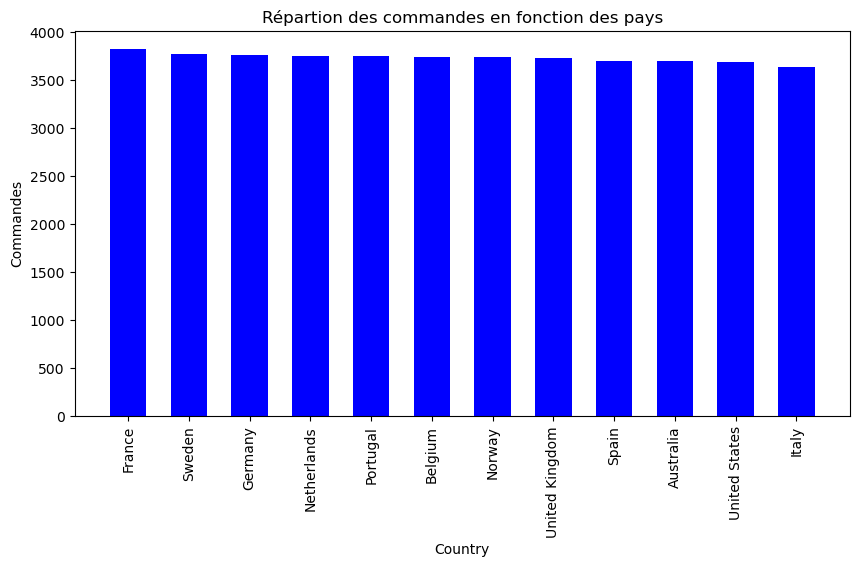

In [126]:
plt.figure(figsize=(10,5))
plt.bar(count_countries.index, count_countries.values, width=0.6, color = "blue")
plt.title("Répartion des commandes en fonction des pays")
plt.xlabel("Country")
plt.ylabel("Commandes")
plt.xticks(rotation =90)
plt.show()

Le pays qui compte le plus de commande est la France avec 3820 commandes. On observe une certaines homgénéités dans la répartition des commandes sur l'ensemble des pays.

### Category

Quelle est la répartition des commandes en fonction du de la catégorie de produit?

In [127]:
count_categories= df["Category"].value_counts()
print(count_categories)

Category
Furniture      9074
Stationery     8957
Electronics    8956
Accessories    8926
Apparel        8891
Name: count, dtype: int64


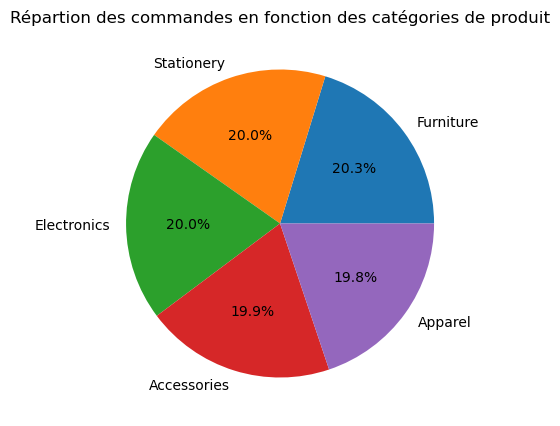

In [128]:
plt.figure(figsize=(10,5))
plt.pie(count_categories.values, labels= count_categories.index, autopct='%1.1f%%')
plt.title("Répartion des commandes en fonction des catégories de produit")
plt.xticks(rotation =90)
plt.show()

### Warehouse

Quelle est la répartition des commandes en fonction du WarehouseLocation?

In [129]:
count_warehouses= df["WarehouseLocation"].value_counts()
print(count_warehouses)

WarehouseLocation
Amsterdam    9175
London       8947
Rome         8935
Berlin       8910
Paris        8837
Name: count, dtype: int64


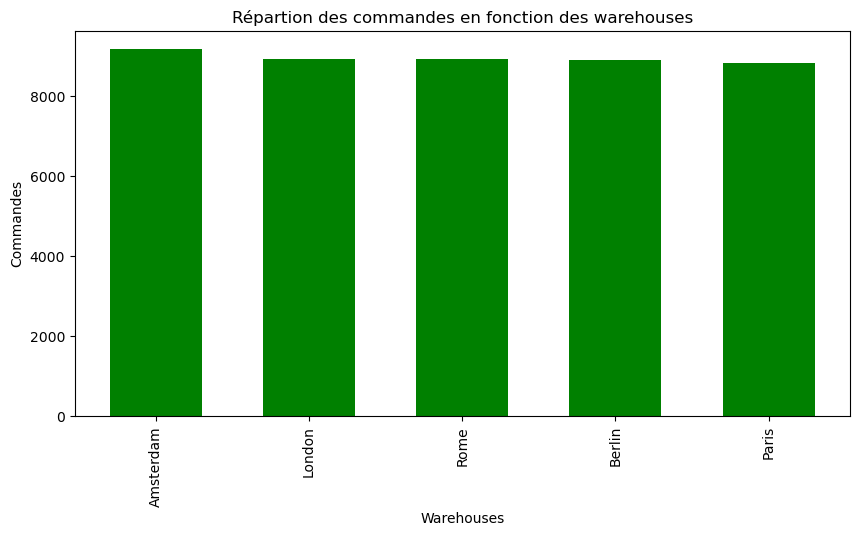

In [130]:
plt.figure(figsize=(10,5))
plt.bar(count_warehouses.index, count_warehouses.values, width=0.6, color = "green")
plt.title("Répartion des commandes en fonction des warehouses")
plt.xlabel("Warehouses")
plt.ylabel("Commandes")
plt.xticks(rotation =90)
plt.show()

### Payment method

Quelle est la répartition des commandes en fonction du WarehouseLocation?

In [131]:
count_payment_methods= df["PaymentMethod"].value_counts()
print(count_payment_methods)

PaymentMethod
Bank Transfer    15086
Credit Card      14907
paypall          14811
Name: count, dtype: int64


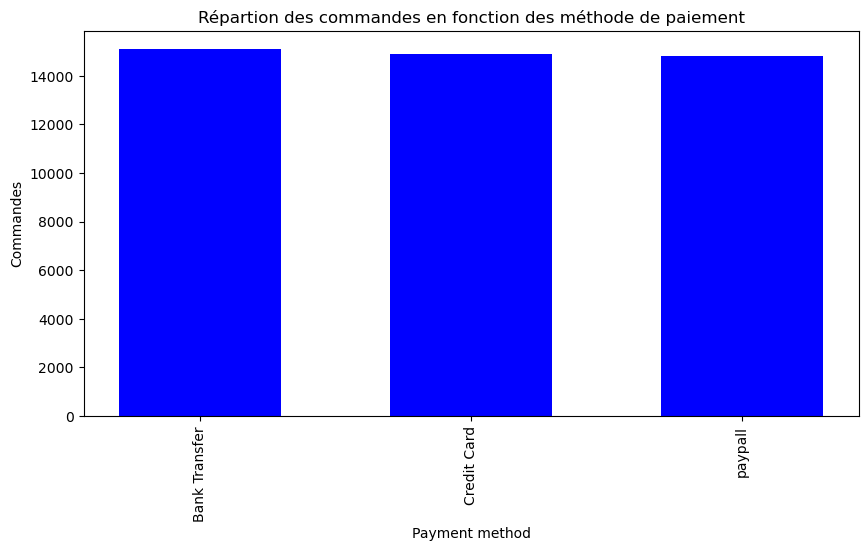

In [170]:
plt.figure(figsize=(10,5))
plt.bar(count_payment_methods.index, count_payment_methods.values, width=0.6, color = "blue")
plt.title("Répartion des commandes en fonction des méthode de paiement")
plt.xlabel("Payment method")
plt.ylabel("Commandes")
plt.xticks(rotation =90)
plt.show()

### Order Priority

Quelle est la répartition des commandes en fonction du WarehouseLocation?

In [173]:
count_order_priority= df["OrderPriority"].value_counts()
print(count_order_pririty)

OrderPriority
Medium    14972
High      14934
Low       14898
Name: count, dtype: int64


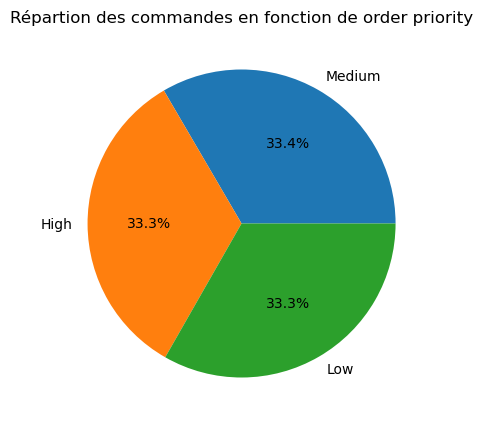

In [174]:
plt.figure(figsize=(10,5))
plt.pie(count_order_priority.values, labels= count_order_priority.index, autopct='%1.1f%%')
plt.title("Répartion des commandes en fonction de order priority")

plt.show()

## Sales Channel

Quelle est la répartition des commandes en fonction du Canal?

In [135]:
count_sales_channel= df["SalesChannel"].value_counts()
print(count_sales_channel)

SalesChannel
Online      22520
In-store    22284
Name: count, dtype: int64


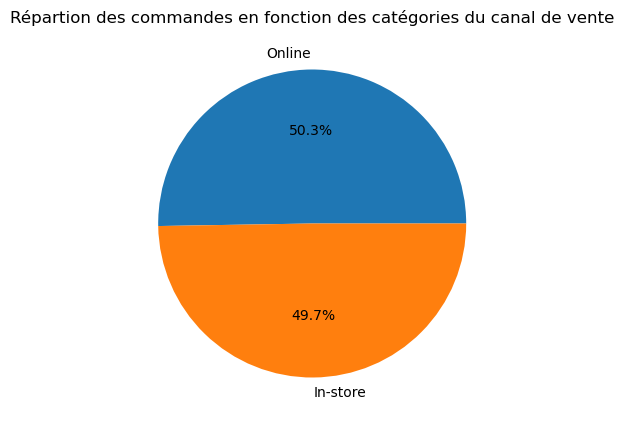

In [172]:
plt.figure(figsize=(10,5))
plt.pie(count_sales_channel.values, labels= count_sales_channel.index, autopct='%1.1f%%')
plt.title("Répartion des commandes en fonction des catégories du canal de vente")
plt.show()

On ne connait pas le nombre de point de vente mais on pourrait s'attendre à une plus grande part des achats en ligne etant donné que les achats en magasins sont limités par une zone de chalandise.

## Features enginerring

In [18]:
df["Revenue"]= (df["Quantity"]*(df["UnitPrice"]-df["Discount"])-df["ShippingCost"]).round(2)
df["Revenue"].head()

0      36.33
1     729.57
2    1386.21
3    1060.48
5    3260.98
Name: Revenue, dtype: float64

In [138]:
df["Year"] = pd.to_datetime(df["InvoiceDate"]).dt.year

In [147]:
df["Year"].value_counts()

Year
2020    7932
2021    7923
2024    7909
2022    7898
2023    7835
2025    5307
Name: count, dtype: int64

In [139]:
df["Month"]= pd.to_datetime(df["InvoiceDate"]).dt.month

In [140]:
df["Day"] = pd.to_datetime(df["InvoiceDate"]).dt.day

In [141]:
df["MonthName"]= pd.to_datetime(df["InvoiceDate"]).dt.month_name()

In [142]:
df["DayName"] = pd.to_datetime(df["InvoiceDate"]).dt.day_name()

In [143]:
df["Quarter"]= pd.to_datetime(df["InvoiceDate"]).dt.quarter

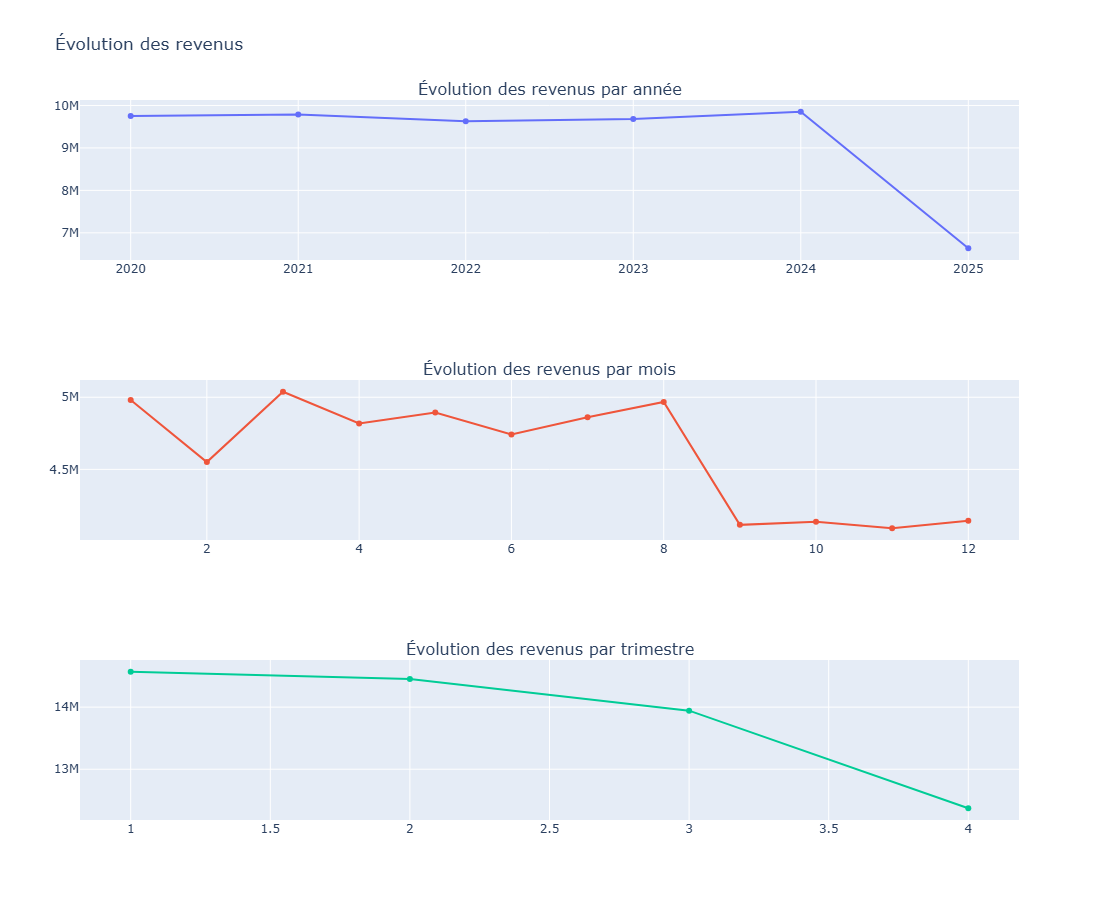

In [156]:
revenue_by_year = df.groupby("Year")["Revenue"].sum().reset_index()
revenue_by_month = df.groupby("Month")["Revenue"].sum().reset_index()
revenue_by_quarter = df.groupby("Quarter")["Revenue"].sum().reset_index()

fig = make_subplots(rows=3, cols=1, subplot_titles=(
    "Évolution des revenus par année", 
    "Évolution des revenus par mois", 
    "Évolution des revenus par trimestre"))

fig.add_trace(go.Scatter(
    x=revenue_by_year["Year"], y=revenue_by_year["Revenue"], mode='lines+markers', name="Année"),
    row=1, col=1)

fig.add_trace(go.Scatter(
    x=revenue_by_month["Month"], y=revenue_by_month["Revenue"], mode='lines+markers', name="Mois"),
    row=2, col=1)

fig.add_trace(go.Scatter(
    x=revenue_by_quarter["Quarter"], y=revenue_by_quarter["Revenue"], mode='lines+markers', name="Trimestre"),
    row=3, col=1)

fig.update_layout(height=900, width=800, title_text="Évolution des revenus", showlegend=False)

fig.show()

Le CA est régulier en fonction des années excepté pour 2025 par manque de données. On constate néanmoins une perte de chiffre d'affaires au troisième trimestre sur 2024.

## Analyse Bivariée

In [160]:
df[df["Year"]==2024].groupby("Country")["Revenue"].sum().sort_values(ascending= False)

Country
Spain             894753.53
Portugal          893223.76
Sweden            886238.23
Germany           875534.11
Belgium           825809.04
Italy             814481.24
United States     800442.93
Australia         799109.70
Netherlands       783543.46
France            779000.50
Norway            750755.05
United Kingdom    748909.52
Name: Revenue, dtype: float64

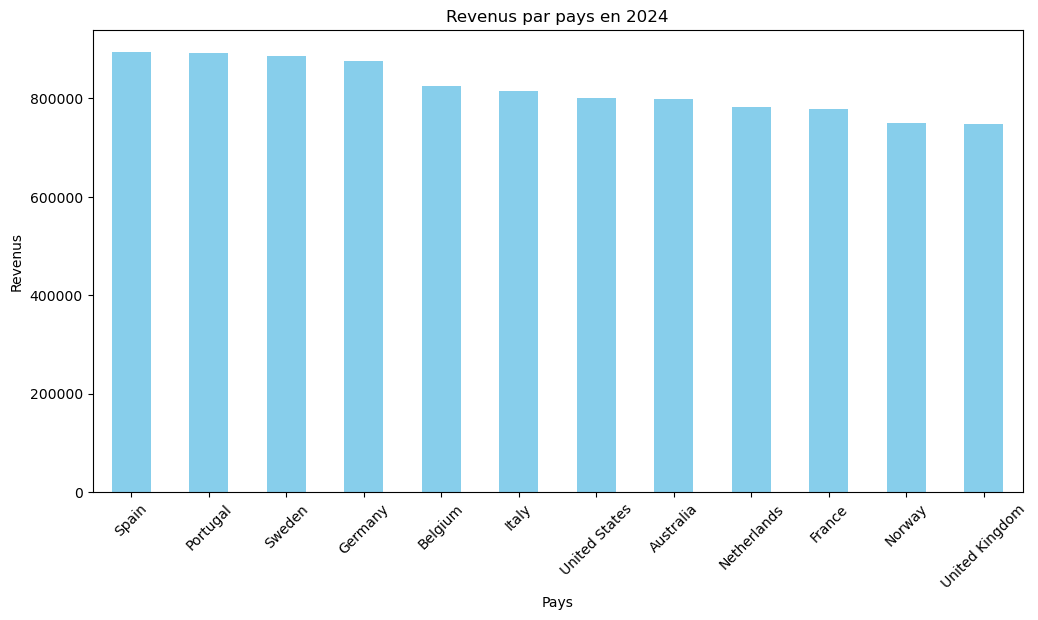

In [175]:
# Revenus par pays en 2024
revenue_by_country = df[df["Year"] == 2024].groupby("Country")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
revenue_by_country.plot(kind="bar", color="skyblue")
plt.title("Revenus par pays en 2024")
plt.xlabel("Pays")
plt.ylabel("Revenus")
plt.xticks(rotation=45)
plt.show()


Sur l'année 2024, le pays le plus contributeur du chiffre d'affaire est l'espagne.

In [161]:
df[df["Year"] == 2024].groupby("Category")["Revenue"].sum().sort_values(ascending=False)

Category
Furniture      2001424.80
Accessories    1989334.21
Stationery     1966117.53
Apparel        1963337.38
Electronics    1931587.15
Name: Revenue, dtype: float64

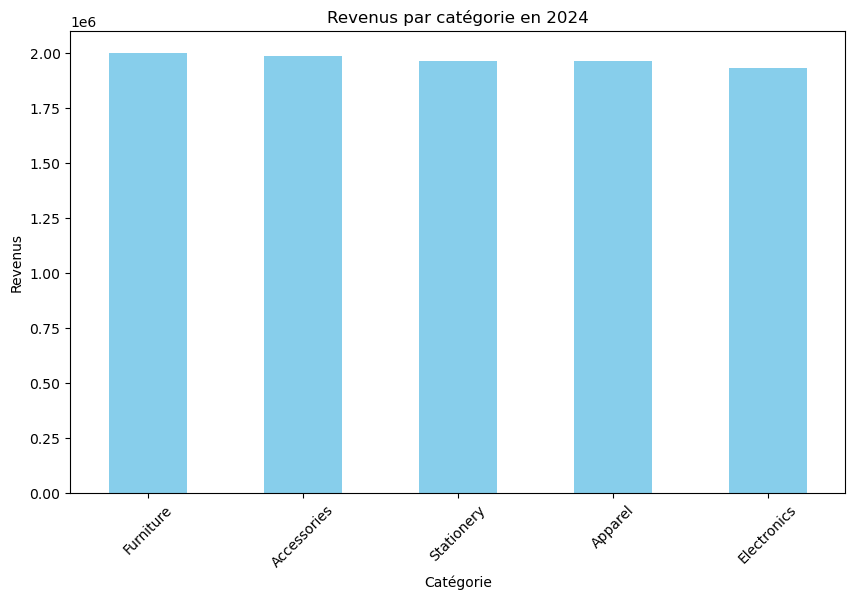

In [179]:
import matplotlib.pyplot as plt

# Calculer les revenus par catégorie en 2024
revenue_by_category = df[df["Year"] == 2024].groupby("Category")["Revenue"].sum().sort_values(ascending=False)

# Créer le graphique en barres
plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind="bar", color="skyblue")
plt.title("Revenus par catégorie en 2024")
plt.xlabel("Catégorie")
plt.ylabel("Revenus")
plt.xticks(rotation=45)
plt.show()

In [164]:
df[df["Year"] == 2024].groupby("Category")["InvoiceNo"].sum().sort_values(ascending=False)

Category
Electronics    886916960
Accessories    878349615
Furniture      866117731
Apparel        863887106
Stationery     841709523
Name: InvoiceNo, dtype: int64

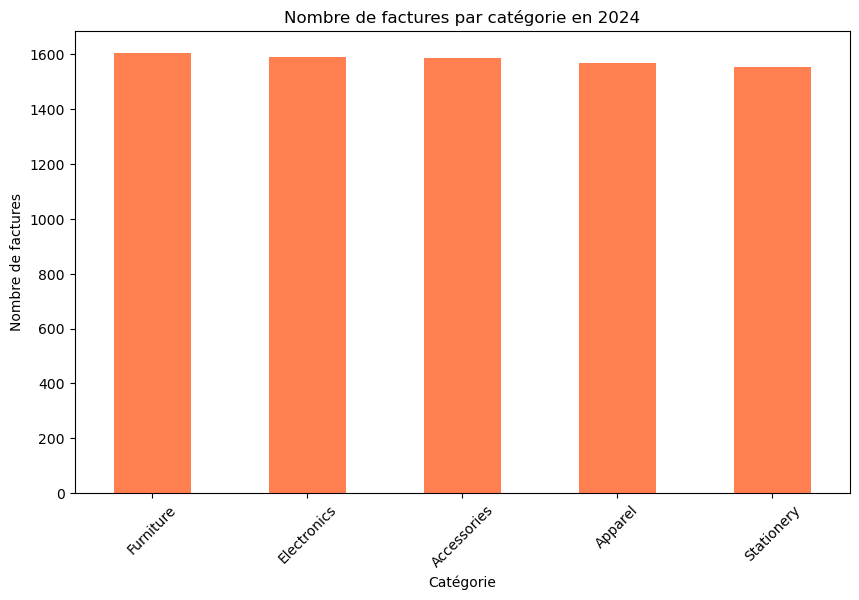

In [180]:
# Calculer le nombre total de factures par catégorie en 2024
invoice_by_category = df[df["Year"] == 2024].groupby("Category")["InvoiceNo"].count().sort_values(ascending=False)

# Créer le graphique en barres
plt.figure(figsize=(10, 6))
invoice_by_category.plot(kind="bar", color="coral")
plt.title("Nombre de factures par catégorie en 2024")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de factures")
plt.xticks(rotation=45)
plt.show()


In [162]:
df[df["Year"]==2024].groupby("SalesChannel")["Revenue"].sum().sort_values(ascending=False)

SalesChannel
Online      4974081.69
In-store    4877719.38
Name: Revenue, dtype: float64

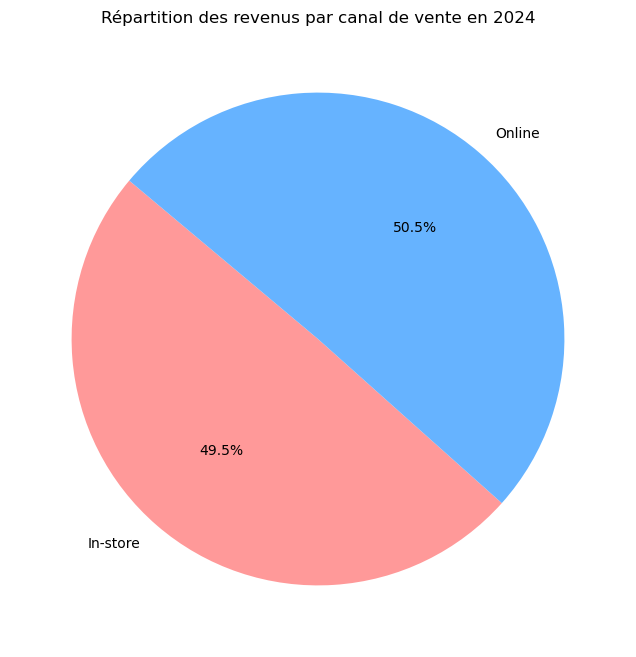

In [181]:
# Calculer les revenus par canal de vente en 2024
revenue_by_channel = df[df["Year"] == 2024].groupby("SalesChannel")["Revenue"].sum()

# Créer le graphique en secteurs
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_channel, labels=revenue_by_channel.index, autopct='%1.1f%%', startangle=140, colors=["#ff9999", "#66b3ff"])
plt.title("Répartition des revenus par canal de vente en 2024")
plt.show()


In [168]:
df[(df["Year"]==2024) & (df["ReturnStatus"]=="Returned")].groupby("Category")["ReturnStatus"].count().sort_values(ascending=False)

Category
Accessories    159
Furniture      158
Stationery     158
Electronics    150
Apparel        143
Name: ReturnStatus, dtype: int64

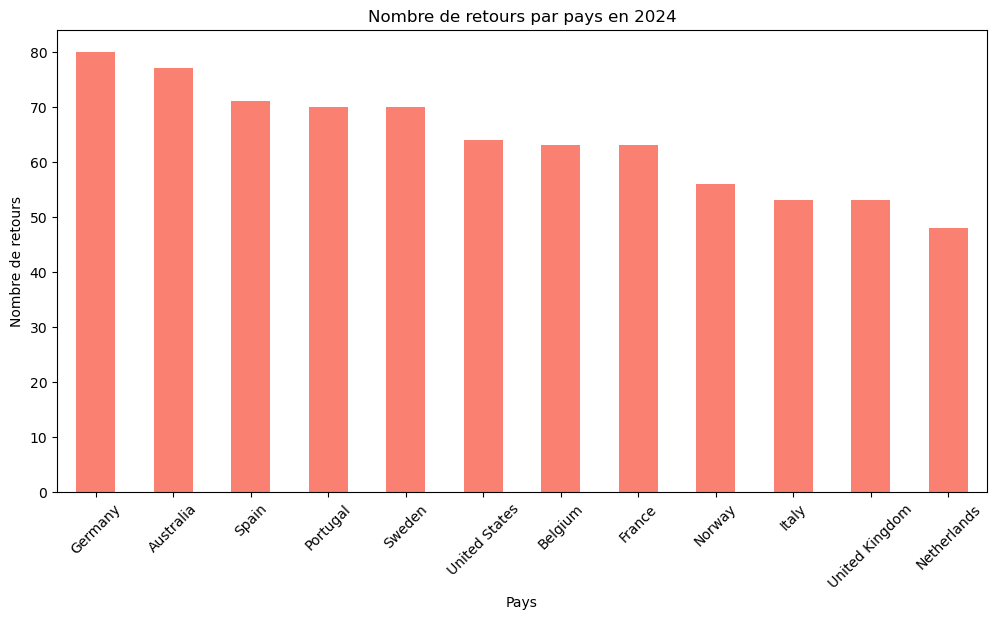

In [177]:
returns_by_country = df[(df["Year"] == 2024) & (df["ReturnStatus"] == "Returned")].groupby("Country")["ReturnStatus"].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
returns_by_country.plot(kind="bar", color="salmon")
plt.title("Nombre de retours par pays en 2024")
plt.xlabel("Pays")
plt.ylabel("Nombre de retours")
plt.xticks(rotation=45)
plt.show()

Une premiere préconisation consernant les retours serait d'évaluer les motifs invoqués pour en réduire le nombre.

## Analyse multivariée

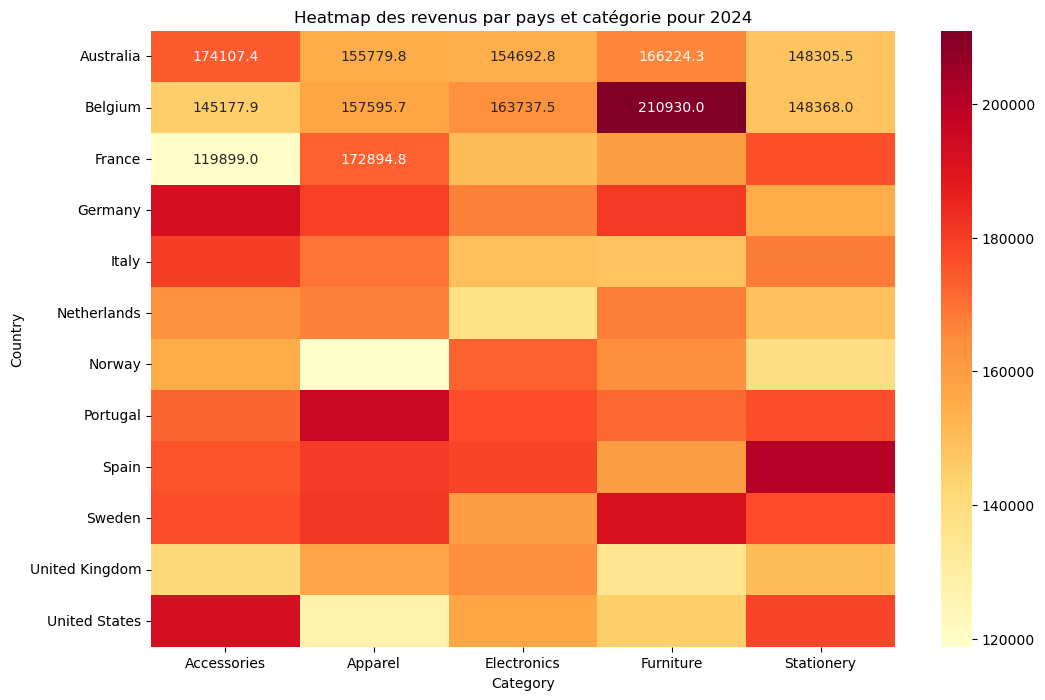

In [183]:
revenue_heatmap = df[df["Year"] == 2024].pivot_table(values="Revenue", index="Country", columns="Category", aggfunc="sum")
plt.figure(figsize=(12, 8))
sns.heatmap(revenue_heatmap, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Heatmap des revenus par pays et catégorie pour 2024")
plt.show()


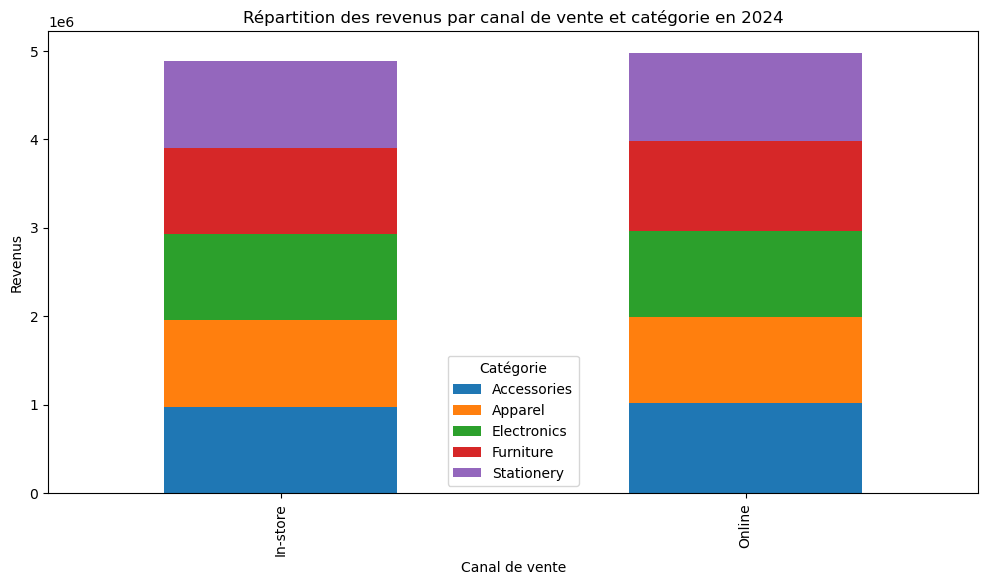

In [185]:
revenue_by_channel_category = df[df["Year"] == 2024].groupby(["SalesChannel", "Category"])["Revenue"].sum().unstack()
revenue_by_channel_category.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Répartition des revenus par canal de vente et catégorie en 2024")
plt.xlabel("Canal de vente")
plt.ylabel("Revenus")
plt.legend(title="Catégorie")
plt.show()


In [186]:
revenue_by_payment = df[df["Year"] == 2024].groupby("PaymentMethod")["Revenue"].sum()
returns_by_payment = df[(df["Year"] == 2024) & (df["ReturnStatus"] == "Returned")].groupby("PaymentMethod")["ReturnStatus"].count()
print(revenue_by_payment)
print(returns_by_payment)


PaymentMethod
Bank Transfer    3282398.25
Credit Card      3202435.68
paypall          3366967.14
Name: Revenue, dtype: float64
PaymentMethod
Bank Transfer    268
Credit Card      238
paypall          262
Name: ReturnStatus, dtype: int64
